# 05 - Taming Text - Exercise 1

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Generating a Wordcloud

In [6]:
from wordcloud import WordCloud

For this first part, we simply get all the emails from the CSV file (more specifically the subjects and the body of each email). Afterwards, we create a long raw text with all the content of the subjects and the body content concatenated.

In [8]:
path_emails = 'hillary-clinton-emails/Emails.csv'

emails = pd.read_csv(path_emails, usecols=['ExtractedSubject', 'ExtractedBodyText'])
emails.fillna(' ', inplace = True)
emails['subject_body'] = emails['ExtractedSubject'] + ' ' + emails['ExtractedBodyText']
emails_raw = np.asarray(emails['subject_body'])

# concatenate all emails in one string
emails_raw_text = ' '.join(np.array(emails['subject_body']))

Now we use this entire raw text to create the **word cloud image**. It generates an image with the words that are the more represented in the text.
Since we got the raw content of emails, we can observe that words like *Re*, *FW*, *FYI* or even *am* and *pm* are present in the image because they are small words or abreviations that people are used to write in emails. Indeed, they have a specific meaning in this context. 

However, we would like to see words that are really interested for human to know more about the topics and the real content of these emails.
In order to do that, we will need to do some clean fo the words...

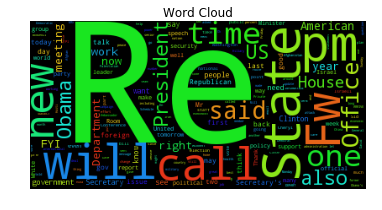

In [11]:
# generate wordcloud on the raw corpus
wordcloud_raw = WordCloud().generate(emails_raw_text)

# Display the generated image
plt.imshow(wordcloud_raw)
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Text Pre-Processing Pipeline

In [16]:
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords

##### RUN ONLY ONCE #####
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

We tokenize each word seperately to be able to remove those that are not relevant for us. Afterwards we do some tricks to clean everything:
- removing all the "words" that are numbers in fact
- changing tokens and only keeping lower case words
- removing all the stopwords: tokens that are considered to be link words or ponctuations (depends on the language)
- then we add to the list of predefined stopwords every specific words or abreviations mentioned before and specific to emails
- finally we remove all the words that are smaller or equal to 2 characters (they do not represent real topics)

In [17]:
# tokenization
tokens = regexp_tokenize(emails_raw_text, pattern='\w+')

# removal of numbers and digits
tokens = [token for token in tokens if token.isdigit() == False]

# normalization
lowercase_tokens = [token.lower() for token in tokens]

# list of English stopwords
stop_words = set(stopwords.words('english'))

# list of words related to emails
stopwords_emails = ['fyi', 'fm', 'am', 'pm', 'n\'t', 'sent', 'from', 'to', 'subject', 'fw', 'fwd', 'fvv',
                    'cc', 'bcc', 'attachments', 're', 'date', 'html', 'php']
stop_words.update(stopwords_emails)

# stopwords removal
filtered_tokens = [token for token in lowercase_tokens if token not in stop_words]

# remove tokens that are too short
clean_tokens = [token for token in filtered_tokens if len(token) > 2]

In order to **refine** the tokens and try to extract the proper word that are mentioned the most, we will *lemmatize* the tokens. This consists on transform a word to its singular and easiest form. For example, the words *church* and *churches* define the same things but have a different token. After applying *lemmatisation* on these 2 words, we will get twice the token *church*.

When we have all the interesting tokens in their most standard form, we can do as we did before: concatenate everything in a big text.

In [18]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
lemmatized = [wnl.lemmatize(token) for token in clean_tokens]

# concatenate all tokens in one string
emails_clean_text = ' '.join(lemmatized)

Again, we use the same steps to create the **word cloud image**. The result is much more interesting because we have words that are more meaningful and represent a real topic.

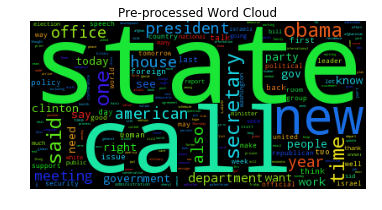

In [21]:
# generate wordcloud after pre-processing the text
wordcloud_clean = WordCloud().generate(emails_clean_text)

# display the wordcloud
plt.imshow(wordcloud_clean)
plt.axis('off')
plt.title('Pre-processed Word Cloud')
plt.show()